Устанавливаем библиотеку c YOLO8:


In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.6/756.6 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Импортируем нужные библиотеки:

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from ultralytics.utils.checks import check_imshow
from ultralytics.utils.plotting import Annotator, colors

from collections import defaultdict

Нужно скачать обрабатываемое видео в папку /content/sample_data/ или изменить код ниже:

In [ ]:
path = "/content/sample_data/traffic.mp4"

In [ ]:
SOURCE_VIDEO_PATH = path

Отобразим кадр и нарисуем будущий шаблон для подсчёта машин:

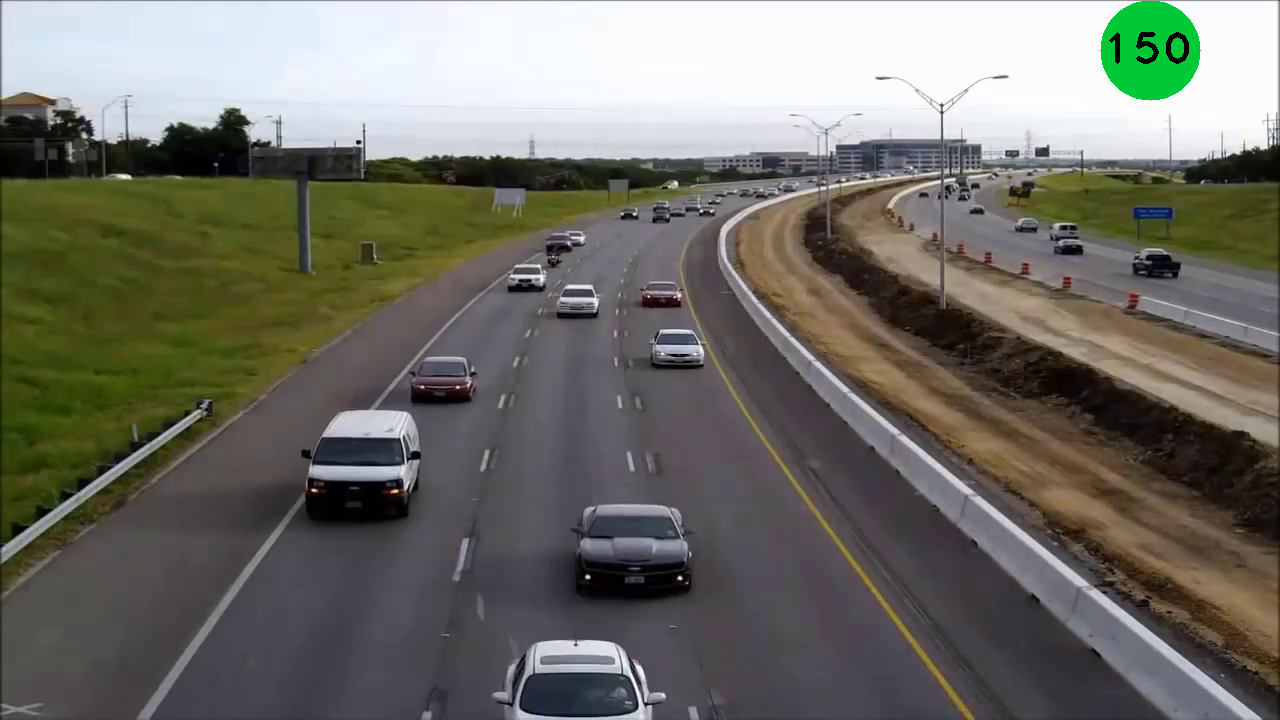

In [ ]:
from google.colab.patches import cv2_imshow
video_path = "/content/sample_data/traffic.mp4"
maximum = 150
cap = cv2.VideoCapture(video_path)
success, frame = cap.read()

cv2.circle(frame, (1150, 50), 50, (55, 200, 0), thickness = -1)
cv2.putText(frame, str(maximum), (1102, 64), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 0), 3)
from google.colab.patches import cv2_imshow
cv2_imshow(frame)

In [ ]:
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width, height)

1280 720


Блок подсчёта машин на видео:

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

from ultralytics.utils.checks import check_imshow
from ultralytics.utils.plotting import Annotator, colors

from collections import defaultdict

a = []
maximum = 0
track_history = defaultdict(lambda: [])
model = YOLO("yolov8n.pt")
names = model.model.names

video_path = "/content/sample_data/traffic.mp4"
cap = cv2.VideoCapture(video_path)
assert cap.isOpened(), "Нет такого видео"

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

result = cv2.VideoWriter("object_tracking.mp4",
                       cv2.VideoWriter_fourcc(*'mp4v'),
                       fps,
                       (w, h))

while cap.isOpened():
    success, frame = cap.read()
    if success:
        results = model.track(frame, classes = [2], persist=True, verbose=False) # выбираем только класс машин
        boxes = results[0].boxes.xyxy.cpu()

        if results[0].boxes.id is not None: # если на кадре что-то было задетектировано

            # Extract prediction results
            clss = results[0].boxes.cls.cpu().tolist()  # Извлечение результатов предсказания
            track_ids = results[0].boxes.id.int().cpu().tolist()
            confs = results[0].boxes.conf.float().cpu().tolist()

            annotator = Annotator(frame, line_width=2)

            for box, cls, track_id in zip(boxes, clss, track_ids):
                label = str(track_id) # номер id для детекции
                annotator.box_label(box, color=colors(int(cls), True), label=f"id : {label}")

                a = a + list(set(results[0].boxes.id.int().cpu().tolist()) - set(a))
                maximum = max(max(results[0].boxes.id.int().cpu().tolist()), maximum) # можно вывести отдельно, сколько машин подсчиталось

                cv2.circle(frame, (1150, 50), 50, (55, 200, 0), thickness = -1)
                cv2.putText(frame, str(maximum), (1102, 64), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 0), 3) # добавляем счётчик на кадры


        result.write(frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

result.release()
cap.release()
cv2.destroyAllWindows()
#print(maximum)  - это число и показывает, сколько всего машин было посчитано


100%|██████████| 6.23M/6.23M [00:00<00:00, 80.5MB/s]


requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.1s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Можно скачать файл в ячейке ниже:

In [ ]:
from google.colab import files
files.download('/content/object_tracking.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>